In [1]:
import numpy as np
import pandas as pd
from sklearn import mixture
import matplotlib.pyplot as plt

In [2]:
def vectortoimg(v,show=True):
    plt.imshow(v.reshape(48, 48),interpolation='None', cmap='gray')
    plt.axis('off')
    if show:
        plt.show()

In [3]:
data=pd.read_csv("fer2013.csv")

In [4]:
data['emotion'].unique()

array([0, 2, 4, 6, 3, 5, 1], dtype=int64)

In [5]:
Train_Data=data[data['Usage']=='Training'].drop('Usage', axis=1)

In [6]:
Train_data=Train_Data.drop('emotion', axis=1)

In [7]:
Train_data.head()

,pixels1,pixels2,pixels3,pixels4,pixels5,pixels6,pixels7,pixels8,pixels9,pixels10,...,pixels2295,pixels2296,pixels2297,pixels2298,pixels2299,pixels2300,pixels2301,pixels2302,pixels2303,pixels2304
0,70,80,82,72,58,58,60,63,54,58,...,159,182,183,136,106,116,95,106,109,82
1,151,150,147,155,148,133,111,140,170,174,...,105,108,95,108,102,67,171,193,183,184
2,231,212,156,164,174,138,161,173,182,200,...,104,138,152,122,114,101,97,88,110,152
3,24,32,36,30,32,23,19,20,30,41,...,174,126,132,132,133,136,139,142,143,142
4,4,0,0,0,0,0,0,0,0,0,...,12,34,31,31,31,27,31,30,29,30


In [8]:
image_data = np.array(Train_data)

Checking one training vector by plotting image:


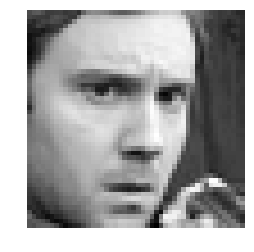

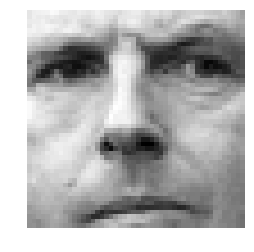

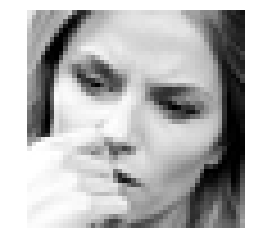

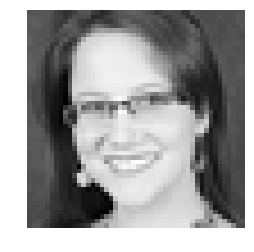

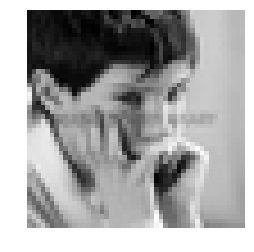

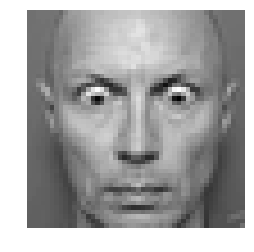

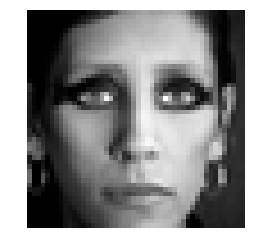

In [9]:
print("Checking one training vector by plotting image:")
vectortoimg(image_data[0])    #0 = Anger
vectortoimg(image_data[301])  #1 = Disgust
vectortoimg(image_data[2])    #2 = Fear
vectortoimg(image_data[7])    #3 = Happy
vectortoimg(image_data[3])    #4 = Sad
vectortoimg(image_data[15])   #5 = Surprise
vectortoimg(image_data[4])    #6 = Neutral

In [10]:
clf = mixture.GaussianMixture(n_components=7, covariance_type='full')
clf.fit(Train_data)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=7, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [11]:
Labels_train = clf.predict(Train_data)

In [12]:
prob_train = clf.predict_proba(Train_data)

In [13]:
def Train_Label(L, P):
    cAnger, cDisgust, cFear, cHappy, cSad, cSurprise, cNeutral = 0, 0, 0, 0, 0, 0, 0
    label = np.zeros(len(L)).astype('str')
    probability = np.zeros(len(P)).astype('float64')
    for i in range(len(L)):
        if L[i]==0:
            label[i]='Angry'
            cAnger += 1
            probability[i] = P[i][0]
        elif L[i]==1:
            label[i]='Disgust'
            cDisgust += 1
            probability[i] = P[i][1]
        elif L[i]==2:
            label[i]='Fear'
            cFear += 1
            probability[i] = P[i][2]
        elif L[i]==3:
            label[i]='Happy'
            cHappy += 1
            probability[i] = P[i][3]
        elif L[i]==4:
            label[i]='Sad'
            cSad += 1
            probability[i] = P[i][4]
        elif L[i]==5:
            label[i]='Surprise'
            cSurprise += 1
            probability[i] = P[i][5]
        else:
            label[i]='Neutral'
            cNeutral += 1
            probability[i] = P[i][6]
    return label, probability, cAnger, cDisgust, cFear, cHappy, cSad, cSurprise, cNeutral

In [16]:
labels, probability, cAnger, cDisgust, cFear, cHappy, cSad, cSurprise, cNeutral = Train_Label(Labels_train, prob_train)

In [17]:
labels[:25]

array(['Neutral', 'Surprise', 'Fear', 'Disgust', 'Neutral', 'Fear',
       'Fear', 'Neutral', 'Fear', 'Happy', 'Surprise', 'Sad', 'Sad',
       'Happy', 'Neutral', 'Fear', 'Neutral', 'Happy', 'Sad', 'Surprise',
       'Angry', 'Neutral', 'Disgust', 'Surprise', 'Angry'], dtype='<U32')

In [18]:
probability

array([1., 1., 1., ..., 1., 1., 1.])

In [19]:
cAnger

3608

In [20]:
cDisgust

3912

In [21]:
cFear

4511

In [22]:
cHappy

4002

In [23]:
cSad

4112

In [24]:
cSurprise

4159

In [25]:
cNeutral

4405

In [26]:
cAnger+ cDisgust+ cFear+ cHappy+ cSad+ cSurprise+ cNeutral

28709